<a href="https://colab.research.google.com/github/jegadeesh2001/Image-Classification/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
(X_train , y_train) , (X_test , y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape 

(50000, 32, 32, 3)

In [5]:
classes = ["airplane", "automobile" , "bird" , "cat" , "deer" , "dog" , "frog" , "horse" , "ship" , "truck"]

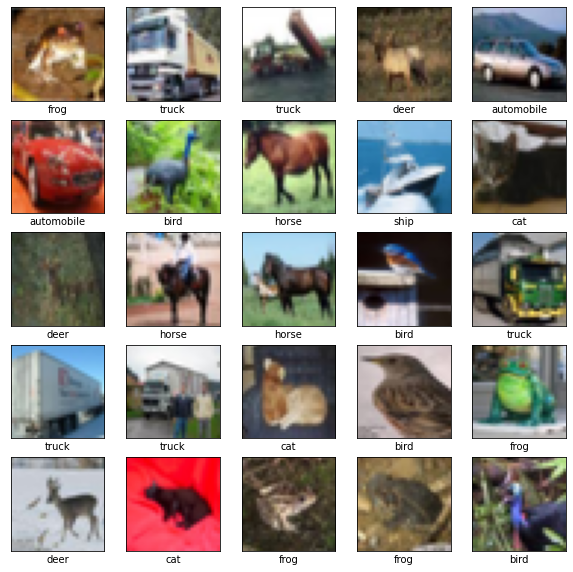

In [9]:
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(classes[y_train[i][0]])

plt.show()

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32 , (3,3) , activation="relu" ,input_shape = (32,32,3)),
    MaxPooling2D(pool_size= (2,2)),

    Conv2D(64 , (3,3) , activation="relu"),
    MaxPooling2D(pool_size= (2,2)),

    Conv2D(64 , (3,3) , activation="relu"),
    MaxPooling2D(pool_size= (2,2)),

    Flatten(),
    Dense(64 , activation="relu"),
    Dense(10  ,activation="softmax")
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [13]:
model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

In [14]:
model.fit(X_train , y_train , epochs=10 , validation_data=(X_test , y_test))

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.5655 - accuracy: 0.4313 - val_loss: 1.2919 - val_accuracy: 0.5382
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1925 - accuracy: 0.5766 - val_loss: 1.1964 - val_accuracy: 0.5818
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0586 - accuracy: 0.6267 - val_loss: 1.0323 - val_accuracy: 0.6406
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9616 - accuracy: 0.6629 - val_loss: 0.9687 - val_accuracy: 0.6597
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8952 - accuracy: 0.6871 - val_loss: 0.9501 - val_accuracy: 0.6661
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8369 - accuracy: 0.7062 - val_loss: 0.9567 - val_accuracy: 0.6714
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7909 - accuracy: 0.7238 - val_loss: 0.9293 -

In [15]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.8882 - accuracy: 0.6979


[0.8881540894508362, 0.6978999972343445]

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.70      0.71      1000
           1       0.79      0.85      0.82      1000
           2       0.64      0.55      0.59      1000
           3       0.55      0.51      0.53      1000
           4       0.74      0.55      0.63      1000
           5       0.57      0.66      0.61      1000
           6       0.82      0.71      0.76      1000
           7       0.67      0.80      0.73      1000
           8       0.72      0.88      0.79      1000
           9       0.78      0.78      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [21]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [18]:
pred = model.predict(X_test)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[[2.83061760e-03 6.01521460e-04 7.08958460e-03 ... 2.43432471e-03
  2.43897289e-02 6.57946570e-04]
 [2.07456667e-03 2.94238366e-02 9.66581865e-06 ... 5.73094667e-07
  9.67216849e-01 1.26569602e-03]
 [2.71656755e-02 1.71534091e-01 3.70069547e-03 ... 1.57701224e-03
  4.79414433e-01 3.11022162e-01]
 ...
 [2.51076417e-05 1.57520265e-06 3.65992822e-03 ... 1.11648450e-02
  3.48003814e-05 1.01325168e-06]
 [2.02075373e-02 8.04259241e-01 1.21857738e-02 ... 3.12619954e-02
  8.69977381e-03 5.39510883e-03]
 [8.77876300e-06 3.79843215e-07 4.03383965e-05 ... 9.99036431e-01
  1.53704320e-07 1.05400225e-07]]
[3 8 8 ... 5 1 7]


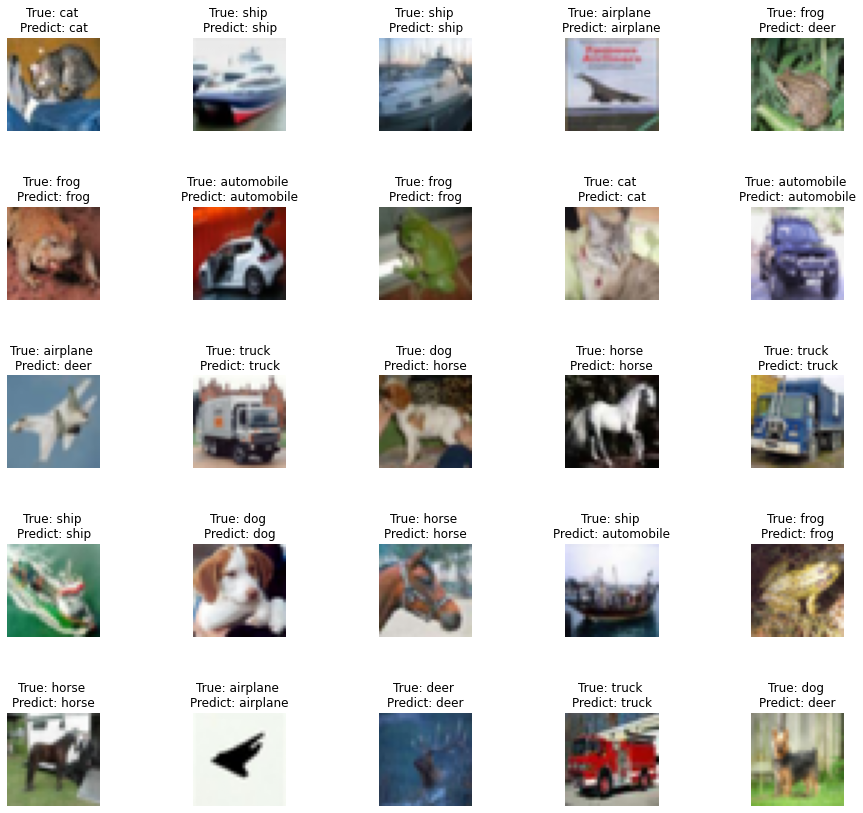

In [23]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (classes[y_test[i][0]], classes[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [24]:
model.save("my_model.h5")